Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Load Data

In [4]:
data=pd.read_csv('StudentPerformanceFactors.csv')

In [5]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
data.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [22]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Filling Null Values

In [8]:
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0],inplace=True)

/tmp/ipython-input-3250007425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0],inplace=True)


In [9]:
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0],inplace=True)

/tmp/ipython-input-4185195806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0],inplace=True)


In [10]:
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0],inplace=True)

/tmp/ipython-input-476087560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0],inplace=True)


Valid Score

In [11]:
data=data[(data['Exam_Score']>0)& (data['Exam_Score']<=100)]

Feature and Labels

In [12]:
X=data[['Hours_Studied']]
Y=data['Exam_Score']

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

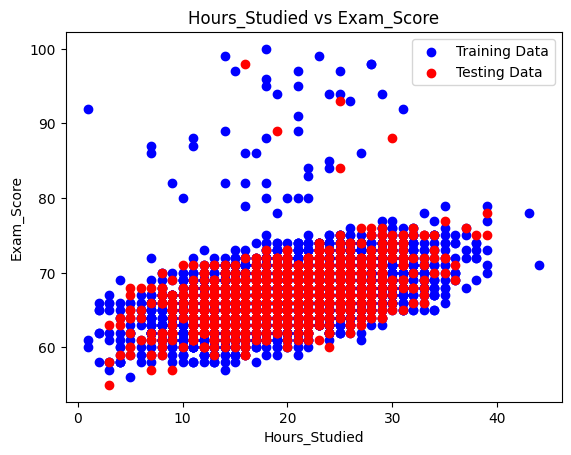

In [14]:
plt.scatter(X_train,Y_train,color='blue',label='Training Data')
plt.scatter(X_test,Y_test,color='red',label='Testing Data')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Hours_Studied vs Exam_Score')
plt.legend()
plt.show()

Linear Regression

In [15]:
X_test_poly=PolynomialFeatures(degree=2).fit_transform(X_test)
X_train_poly=PolynomialFeatures(degree=2).fit_transform(X_train)

In [16]:
model=LinearRegression()
model.fit(X_train_poly,Y_train)

LinearRegression()

In [17]:
Y_Predict=model.predict(X_test_poly)

In [18]:
r2=r2_score(Y_test,Y_Predict)
mse=mean_squared_error(Y_test,Y_Predict)
print('R2 Score:',r2)
print('Mean Squared Error:',mse)

R2 Score: 0.24786205055235366
Mean Squared Error: 9.94643697943927


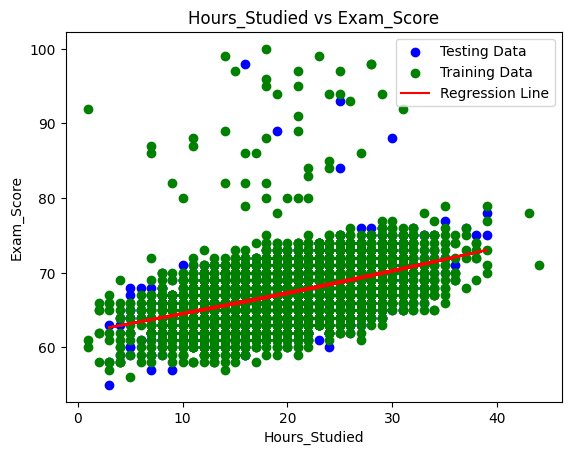

In [19]:
plt.scatter(X_test,Y_test,color='blue',label='Testing Data')
plt.scatter(X_train,Y_train,color='green',label='Training Data')
plt.plot(X_test,Y_Predict,color='red',label='Regression Line')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Hours_Studied vs Exam_Score')
plt.legend()
plt.show()

In [20]:
model.score(X_test_poly,Y_test)

0.24786205055235366

In [21]:
model.score(X_train_poly,Y_train)

0.18903884203371624